Задачи

Разработать алгоритм выявления подозрительных пользователей

1) Загрузить данные (<дата>, <время>, <id пользователя>,
<страна>, <города>, <провайдер>).

2) Преобразовать данные для выделения факторов, влияющих на
подозрительность пользователя.

3) Разработать правила, по которым определять подозрительных
пользователей (стат. методы или экспертное мнение).

4) Разработать модель машинного обучения для выявления
кластера подозрительных пользователей.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1) Загрузка данных

In [2]:
#данные подключения пользователей к игре
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Perm_IT_Univer/ML/7_Claster/GeoEntrance.csv', names=['date', 'time', 'id_user','country','city','provider'])
df.head()

,date,time,id_user,country,city,provider
0,25-04-2015,00:01:07:726,3000084364803,Turkey,Istanbul,Turk Telekomunikasyon Anonim Sirketi
1,25-04-2015,00:02:33:815,3000091385953,Finland,NaN,DNA Oy
2,25-04-2015,00:02:40:090,3000093997963,United States,NaN,AT&T Services
3,25-04-2015,00:02:46:882,3000091574741,Morocco,NaN,MT-MPLS
4,25-04-2015,00:03:28:916,3000093340683,United States,Dyer,Gibson Electric Membership Corporation


In [28]:
df.id_user.nunique()

30938

In [3]:
#данные представлены за три дня
df.date.unique()

array(['25-04-2015', '23-04-2015', '24-04-2015'], dtype=object)

2) Преобразование данных для выделения факторов, влияющих на подозрительность

In [6]:
# статистика по пользователям
data_user = df.groupby('id_user').nunique().rename(columns={'date':'n_day', 'time':'n_inputs', 'country':'n_country', 'provider':'n_provider'})
n_user = data_user.shape[0]
data_user.head()

,n_day,n_inputs,n_country,city,n_provider
id_user,,,,,
737340,3,3,1,0,1
760890,1,2,1,0,1
786690,2,4,1,1,1
958863,3,13,1,1,1
1474317,1,4,1,0,1




3) Разработать правила, по которым определять подозрительных пользователей (стат. методы или экспертное мнение).

первичный анализ факторов 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bfe16d30>,
      dtype=object)

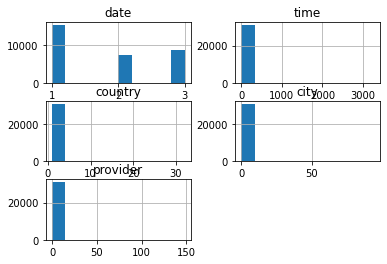

In [ ]:
data_user.hist()


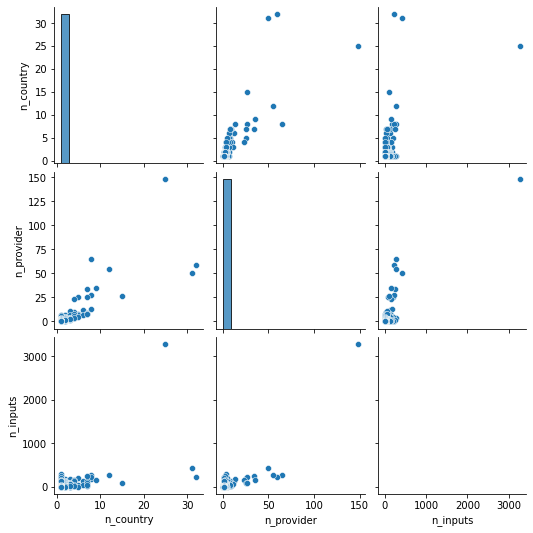

In [7]:
sns_plot = sns.pairplot(data_user[['n_country', 'n_provider', 'n_inputs']])

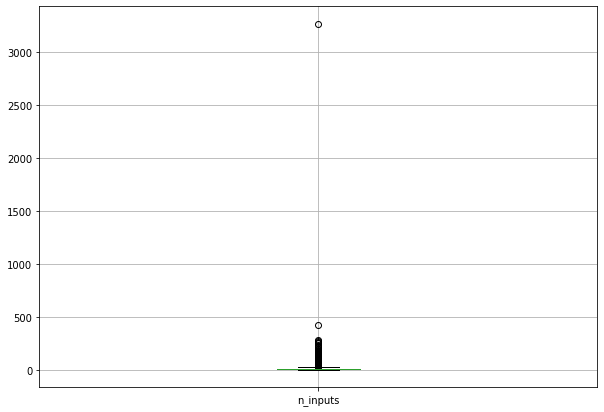

In [9]:
f, ax = plt.subplots(figsize=(10, 7))
data_user.boxplot('n_inputs')

In [25]:
# 1 - выделение подозрительных пользователей методом межквантильных размахов
Q1, Q2, Q3 = np.percentile(data_user['n_inputs'], [25,50,75])
IQR = Q3 - Q1
inputs_upper_inner = Q3 + 3 * IQR

Q1, Q2, Q3 = np.percentile(data_user['n_provider'], [25,50,75])
IQR = Q3 - Q1
provider_upper_inner = Q3 + 3 * IQR

Q1, Q2, Q3 = np.percentile(data_user['n_country'], [25,50,75])
IQR = Q3 - Q1
country_upper_inner = Q3 + 3 * IQR

In [31]:
data_sus_user_stat = data_user[(data_user['n_country']>country_upper_inner)|
                               (data_user['n_provider']>provider_upper_inner)|
                               (data_user['n_inputs']>inputs_upper_inner)].sort_values(by=['n_country','n_provider'])

n_sus_user_stat = data_sus_user_stat.shape[0]
print('% подозрительных юзеров, вычисленных стат. методоами =',round(n_sus_user_stat / n_user * 100))

% подозрительных юзеров, вычисленных стат. методоами = 11


In [32]:
# 2 - выделение подозрительных пользователей экспертным путем
data_sus_user_exp = data_user.query('(n_country > 3) | (n_provider > 4) | (n_inputs > 36)' ).sort_values(by=['n_country','n_provider'])
n_sus_user_exp = data_sus_user_exp.shape[0]
print('% подозрительных юзеров, вычисленных экспертным методом =',round(n_sus_user_exp / n_user * 100))

% подозрительных юзеров, вычисленных экспертным методом = 4


4) Разработать модель машинного обучения для выявления кластера подозрительных пользователей.

% подзрительных юзеров =  0.003232270993600103


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


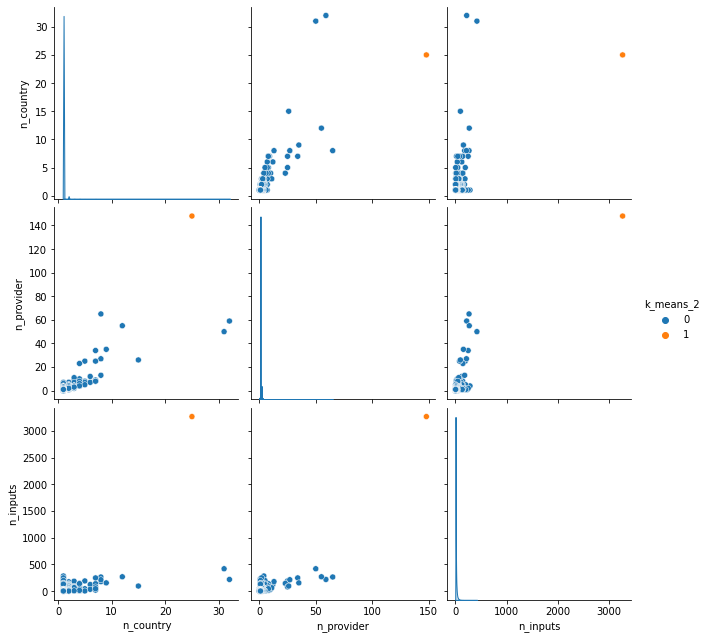

In [36]:
# 3 - кластеризация методом KMeans c 2 кластерами
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(data_user[['n_country', 'n_provider', 'n_inputs']])

print('% подзрительных юзеров = ', sum(kmeans.labels_) / len(kmeans.labels_) *100)

data_user_fig = data_user[['n_country', 'n_provider', 'n_inputs']].copy()
data_user_fig['k_means_2'] = kmeans.labels_

sns.pairplot(
    data=data_user_fig,
    x_vars=['n_country', 'n_provider', 'n_inputs'],
    y_vars=['n_country', 'n_provider', 'n_inputs'],
    hue='k_means_2',
    height=3
)
plt.show()

% подозрительных юзеров =  7.091602559958626


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


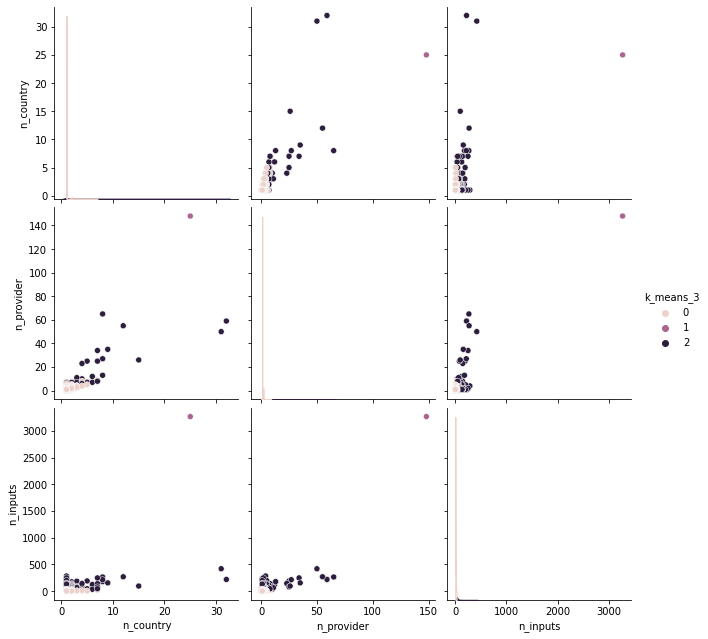

In [37]:
# 4 - кластеризация методом KMeans c 3 кластерами
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0).fit(data_user[['n_country', 'n_provider', 'n_inputs']])

labels = pd.Series(kmeans.labels_)
print('% подозрительных юзеров = ', len(labels[labels != 0]) / len(labels) *100)

data_user_fig['k_means_3'] = kmeans.labels_

sns.pairplot(
    data=data_user_fig,
    x_vars=['n_country', 'n_provider', 'n_inputs'],
    y_vars=['n_country', 'n_provider', 'n_inputs'],
    hue='k_means_3',
    height=3
)

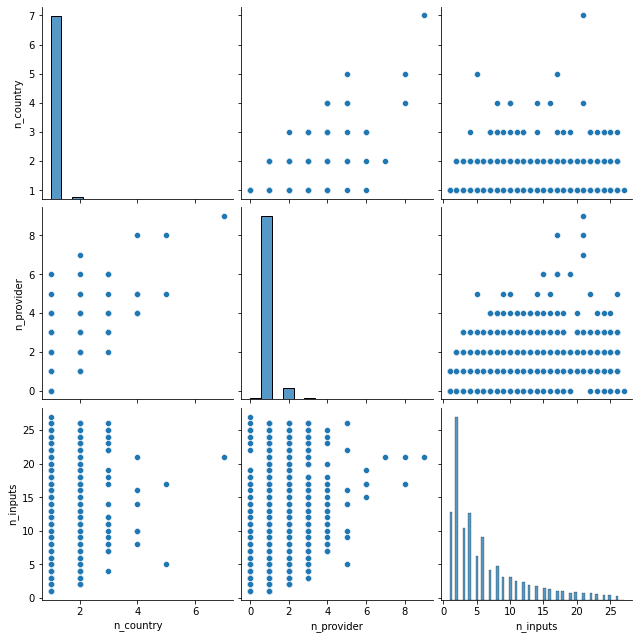

In [41]:
data_rel_user_kmeans = data_user_fig[data_user_fig['k_means_3'] == 0][['n_country', 'n_provider', 'n_inputs']]
sns.pairplot(
    data=data_rel_user_kmeans,
    x_vars=['n_country', 'n_provider', 'n_inputs'],
    y_vars=['n_country', 'n_provider', 'n_inputs'],
    #hue='k_means_3',
    height=3
)

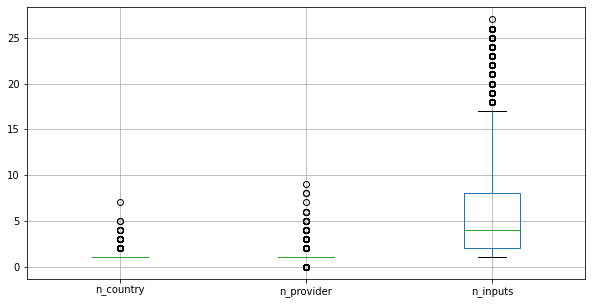

In [42]:
data_rel_user_kmeans.boxplot(figsize=[10,5])

% подозрительных юзеров =  4.06619690994893


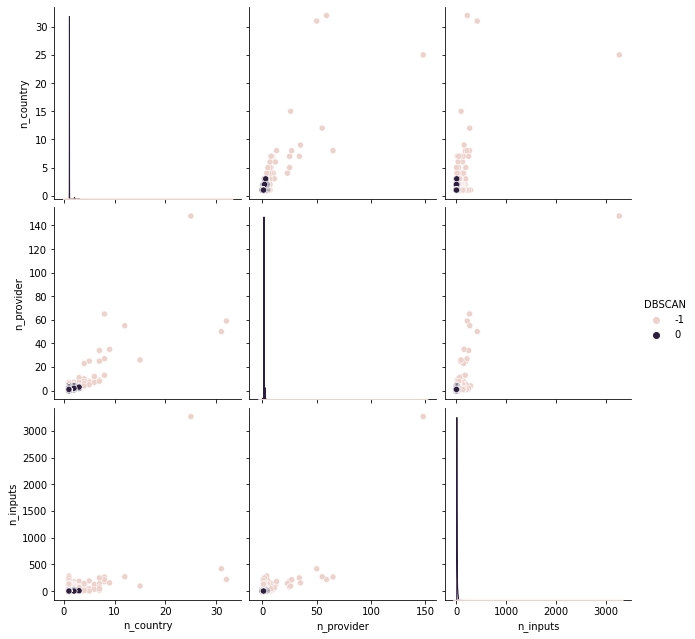

In [44]:
# 5 - кластеризация методом DBSCAN
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

clustering = DBSCAN(eps=2, min_samples=350).fit(data_user[['n_country', 'n_provider', 'n_inputs']])
labels = pd.Series(clustering.labels_)
print('% подозрительных юзеров = ', 100*len(labels[labels != 0]) / len(labels))

data_user_fig['DBSCAN'] = clustering.labels_

sns.pairplot(
    data=data_user_fig,
    x_vars=['n_country', 'n_provider', 'n_inputs'],
    y_vars=['n_country', 'n_provider', 'n_inputs'],
    hue='DBSCAN',
    height=3
)

Результаты данного метода близки к резултатам метода 2 (экспертный метод)

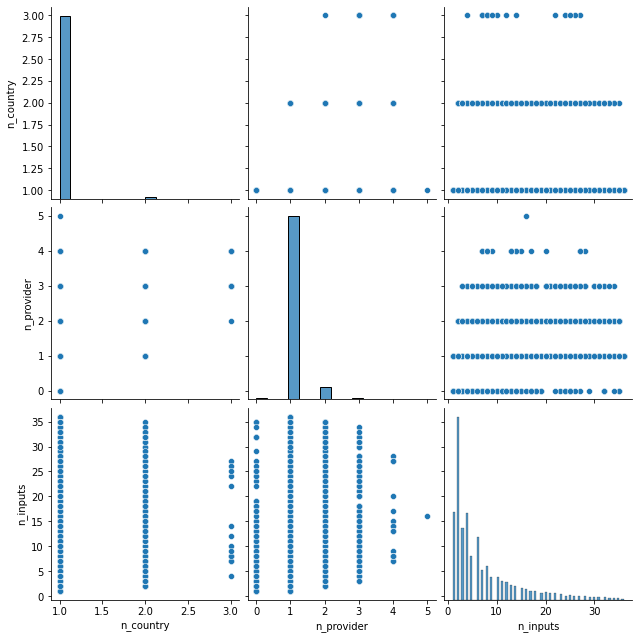

In [45]:
#data_sus_user_DBSCAN = data_user_fig[data_user_fig['DBSCAN'] != 0][['n_country', 'n_provider', 'n_inputs']]
data_rel_user_DBSCAN = data_user_fig[data_user_fig['DBSCAN'] == 0][['n_country', 'n_provider', 'n_inputs']]
sns.pairplot(
    data=data_rel_user_DBSCAN,
    x_vars=['n_country', 'n_provider', 'n_inputs'],
    y_vars=['n_country', 'n_provider', 'n_inputs'],
    #hue='DBSCAN',
    height=3
)

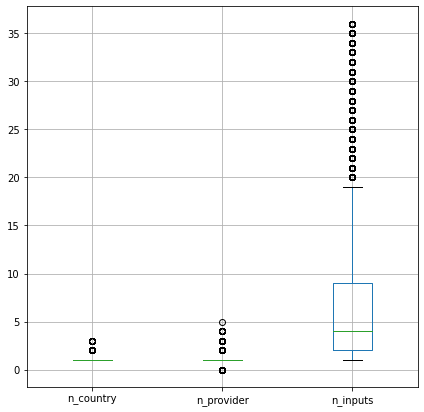

In [46]:
data_rel_user_DBSCAN.boxplot(figsize=[7,7])